# Data Science Project 
## Implementation by-Step Journey from Problem to Solution

1. Import common modules
2. Get the data and plot the first five observations 
3. Use info() method to get a quick description of the data
4. Find out which features are categorical; find out the number of data points in each category
5. Show a summary of the numerical attributes
6. Plot a histogram for each numerical atribute 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# check data types
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
# object dtypes = categorical 

In [7]:
# Create a boolean array for the numerical and categorial data:
housing.dtypes==object

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity        True
dtype: bool

In [8]:
# ^^^ assign it to a new variable
categorical = housing.dtypes==object
categorical

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity        True
dtype: bool

In [9]:
# get columns of dataframe:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
# Create a list of variables that are categorical e.g., a list [] of categorical features using for loop of column names:
categorical_features = [feature for feature in housing.columns\
                      if housing[feature].dtype=="O"] # You can use string "object" or a capital "O"

In [11]:
categorical_features

['ocean_proximity']

In [12]:
# how many unique values does the categorical feature have:
# slice dataframe at "ocean_proximity":
A = housing['ocean_proximity'].value_counts()

In [13]:
# In list format
A.index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [14]:
# turn into a Numpy array
np.array(A.index)

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [15]:
# Continue working on dataset:

In [16]:
# Lets look at the min, max, quartiles etc using describe method:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


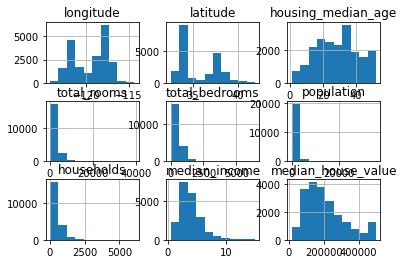

In [17]:
# Lets look at the numerical features:
housing.hist();

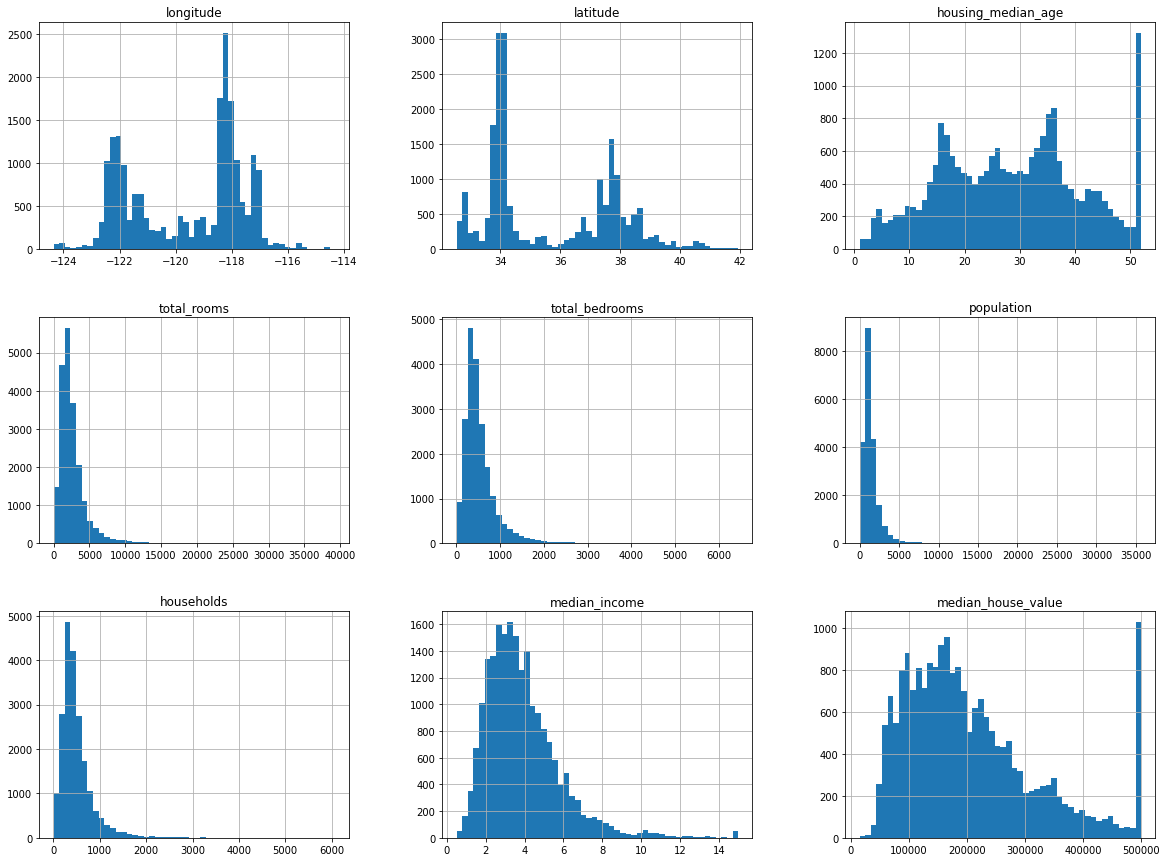

In [18]:
# change bin size - more detail and adjust figure size:
housing.hist(bins=50, figsize=(20,15));

# How features are distributed: bimodal distributions, left skew, right skew etc
# distributions are needed for transformations 

#### Goal: prediciting the median house values for each district - our target variable 

In [19]:
# train test split - MANUALLY

In [20]:
# set random seed
np.random.seed(2)

In [21]:
def split_train_test(data, test_ratio):
    # create random shuffle of indices using NumPy using permutation, focus on number of rows:
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio) #integar not float
    test_indices = shuffled_indices[:test_set_size] # take first 200 indices for test dataset, rest if for train
    train_indices = shuffled_indices[test_set_size:] # last indices for the train
    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
train_set, test_set = split_train_test(housing, 0.2)

In [23]:
len(train_set)

16512

In [24]:
#NB: at this point the training set adn test set have all the feuatrues including the target variable 

In [25]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10385,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,278700.0,<1H OCEAN
1943,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0,INLAND
7490,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0,<1H OCEAN
16889,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0,NEAR OCEAN
11416,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0,<1H OCEAN


7. Split the data into test and train datasets. 
8. Experts told you that "median_income" is a very important attribute. Make sure that both train and test datasets represent the data well.
9. Crate a scatter plot if the data based on longitude and latitude. 
10. Show the scatter plot on a Califonia map. 

In [26]:
# Next we are going to split data in two 
# NB Transformations are carried out after train-test split 

In [27]:
# Split data into train-test and then start transformations on the TRaining dataset 

In [28]:
# Using SkLearn:
from sklearn.model_selection import train_test_split

In [29]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)

In [30]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10385,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,278700.0,<1H OCEAN
1943,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0,INLAND
7490,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0,<1H OCEAN
16889,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0,NEAR OCEAN
11416,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0,<1H OCEAN


##### Note for Classifcation Problems you should use straitification on the target variable. 
##### i.e., there are equal ratios of the target variable at each split

In [31]:
# To avoid a bias dataset - we need a similar distribution of the target variable in both the train and test dataset

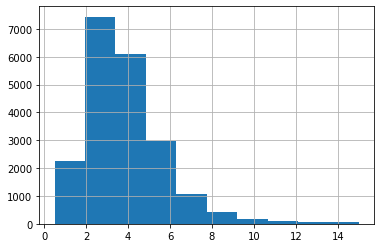

In [32]:
housing['median_income'].hist();

In [33]:
# create new variable for median_income i.e., a categorical version:


In [34]:
# turn continuous variable into categorical variable e.g., turning ages into young or senior. N 60 is young > 60 is senior
housing["income_cat"] = pd.cut(housing['median_income'],\
                              bins=[0,1.5,3,4.5,6, np.inf],labels=[1,2,3,4,5]) # here we are binning data based of hist plot x-axis

In [35]:
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [36]:
# most of the districts are in categories 2,3,4
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

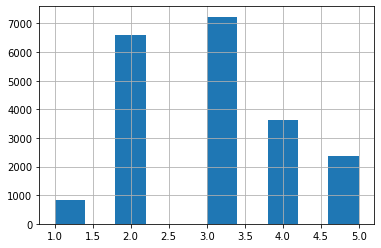

In [37]:
# new categorical data
housing["income_cat"].hist();

In [38]:
# use this new categorical variable to split data for train/test use straified shuffling from sklearn

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

In [40]:
# use cross validation to see if model is over-fitting

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,\
                      random_state=2)


In [41]:
split

StratifiedShuffleSplit(n_splits=1, random_state=2, test_size=0.2,
            train_size=None)

In [42]:
# based on "income_category" split my data into train and test datasets so that the categories are equal in ratio
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [43]:
# train_test_split(housing, stratify=housing['income_cat'])

In [47]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

In [48]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)

In [50]:
# compare train sets:
# create new df:
compare_prop=pd.DataFrame({"Overall": income_cat_proportions(housing),\
                         "Stratified": income_cat_proportions(strat_test_set),\
                          "Random": income_cat_proportions(test_set)})

In [51]:
# 5 categories and the ratios of each categories for each group 
compare_prop.head()

,Overall,Stratified,Random
3,0.350581,0.350533,0.348353
2,0.318847,0.318798,0.312984
4,0.176308,0.176357,0.187258
5,0.114438,0.114341,0.112645
1,0.039826,0.039971,0.038760


In [52]:
# create new column:
compare_prop['RandPerError']=100*(compare_prop['Random']\
                                  /compare_prop["Overall"]-1)

In [53]:
compare_prop['StraPerError']=100*(compare_prop['Stratified']\
                                  /compare_prop["Overall"]-1)

In [54]:
compare_prop # can see the difference in random and stratified errors 

,Overall,Stratified,Random,RandPerError,StraPerError
3,0.350581,0.350533,0.348353,-0.635710,-0.013820
2,0.318847,0.318798,0.312984,-1.838626,-0.015195
4,0.176308,0.176357,0.187258,6.210497,0.027480
5,0.114438,0.114341,0.112645,-1.566469,-0.084674
1,0.039826,0.039971,0.038760,-2.676399,0.364964


### Continue with Visualisation

In [55]:
# training dataset:
house = strat_train_set.copy()

In [57]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
4118,-118.22,34.14,52.0,1388.0,271.0,735.0,239.0,3.7404,247700.0,<1H OCEAN,3
11834,-120.22,39.20,22.0,8259.0,1409.0,845.0,353.0,3.3699,244000.0,INLAND,3
17956,-121.97,37.33,21.0,8275.0,1566.0,3636.0,1524.0,5.1506,302100.0,<1H OCEAN,4
20213,-119.22,34.28,33.0,2467.0,377.0,1052.0,363.0,4.7333,257500.0,NEAR OCEAN,4
8061,-118.20,33.84,35.0,3405.0,779.0,1953.0,671.0,2.7813,159200.0,NEAR OCEAN,2


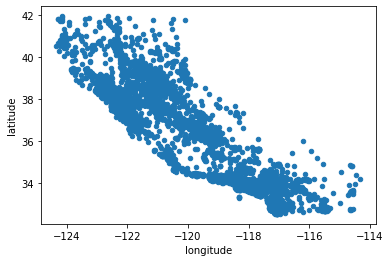

In [59]:
# map of califonia 
house.plot(kind='scatter', x='longitude', y='latitude');

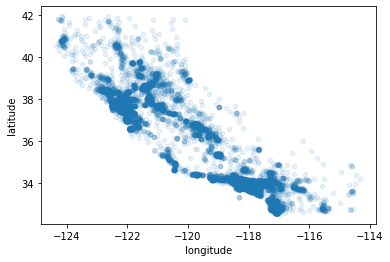

In [60]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

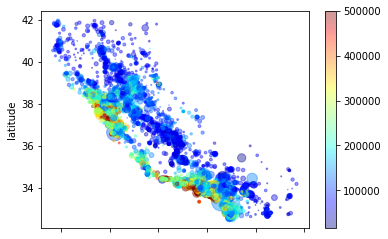

In [61]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,\
           s=house['population']/100,\
           c=house['median_house_value'],\
           cmap=plt.get_cmap('jet'));

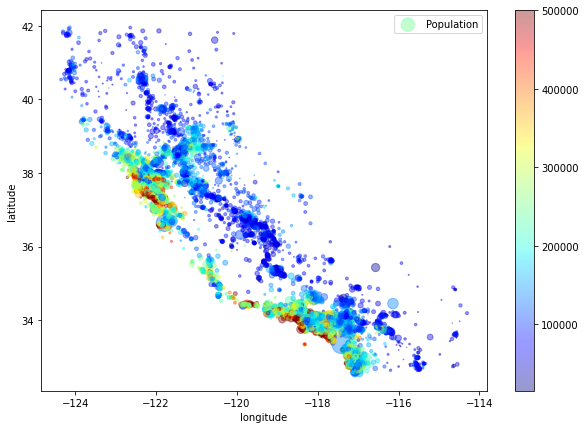

In [62]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,\
           s=house['population']/100,\
           c=house['median_house_value'],\
           cmap=plt.get_cmap('jet'),\
          label="Population", figsize=(10,7), sharex=False)
plt.legend();

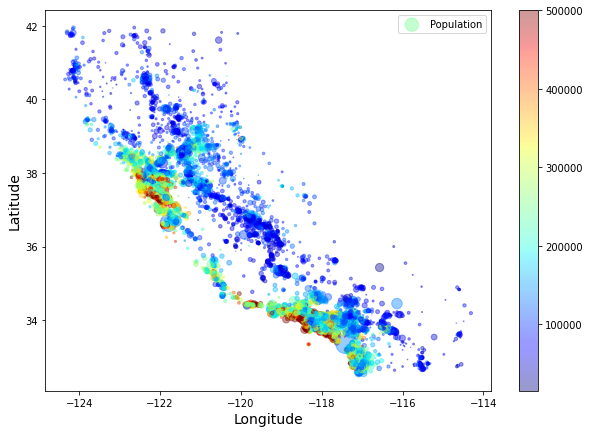

In [68]:
ax=house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,\
           s=house['population']/100,\
           c=house['median_house_value'],\
           cmap=plt.get_cmap('jet'),\
          label="Population", figsize=(10,7), sharex=False)


plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
prices= house["median_house_value"]
tick_values=np.linspace(prices.min(), prices.max(), 11)
plt.legend();

In [70]:
import matplotlib.image as mpimg
califonia_img = mpimg.imread('/Users/fernandes/Desktop/Meet-Up-Tutorial/california.png')

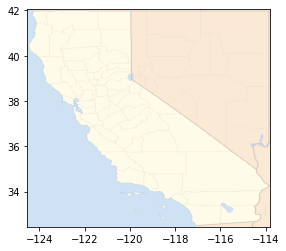

In [73]:
plt.imshow(califonia_img, \
          extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5);

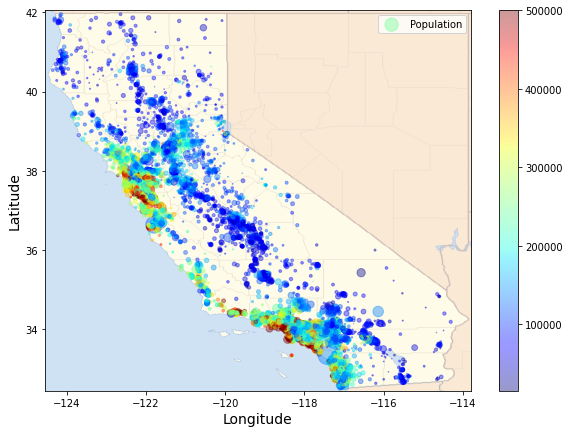

In [74]:
ax=house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,\
           s=house['population']/100,\
           c=house['median_house_value'],\
           cmap=plt.get_cmap('jet'),\
          label="Population", figsize=(10,7), sharex=False)

plt.imshow(califonia_img, \
          extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
prices= house["median_house_value"]
tick_values=np.linspace(prices.min(), prices.max(), 11)
plt.legend();

11. Check the correlations by creating corelation matrix as well as scatter matrix
12. Create new features such as rooms_per_household, bedrooms_per_room, population_per_household

In [76]:
# house is training dataset, correlation between numerical variables:
house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923855,-0.105374,0.045697,0.071680,0.099468,0.055717,-0.016403,-0.045076
latitude,-0.923855,1.000000,0.007684,-0.036778,-0.068165,-0.109602,-0.071823,-0.079563,-0.145865
housing_median_age,-0.105374,0.007684,1.000000,-0.360056,-0.318497,-0.290990,-0.300374,-0.127296,0.098297
total_rooms,0.045697,-0.036778,-0.360056,1.000000,0.929897,0.854076,0.917371,0.203938,0.140277
total_bedrooms,0.071680,-0.068165,-0.318497,0.929897,1.000000,0.874101,0.977668,-0.003289,0.056010
population,0.099468,-0.109602,-0.290990,0.854076,0.874101,1.000000,0.906395,0.011003,-0.016968
households,0.055717,-0.071823,-0.300374,0.917371,0.977668,0.906395,1.000000,0.018401,0.072940
median_income,-0.016403,-0.079563,-0.127296,0.203938,-0.003289,0.011003,0.018401,1.000000,0.686643
median_house_value,-0.045076,-0.145865,0.098297,0.140277,0.056010,-0.016968,0.072940,0.686643,1.000000


In [78]:
# numerical:
numerical_features = [feature for feature in house.columns\
                      if house[feature].dtype!="O"] # not equal to object therefore numerical

In [80]:
house[numerical_features].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923855,-0.105374,0.045697,0.071680,0.099468,0.055717,-0.016403,-0.045076
latitude,-0.923855,1.000000,0.007684,-0.036778,-0.068165,-0.109602,-0.071823,-0.079563,-0.145865
housing_median_age,-0.105374,0.007684,1.000000,-0.360056,-0.318497,-0.290990,-0.300374,-0.127296,0.098297
total_rooms,0.045697,-0.036778,-0.360056,1.000000,0.929897,0.854076,0.917371,0.203938,0.140277
total_bedrooms,0.071680,-0.068165,-0.318497,0.929897,1.000000,0.874101,0.977668,-0.003289,0.056010
population,0.099468,-0.109602,-0.290990,0.854076,0.874101,1.000000,0.906395,0.011003,-0.016968
households,0.055717,-0.071823,-0.300374,0.917371,0.977668,0.906395,1.000000,0.018401,0.072940
median_income,-0.016403,-0.079563,-0.127296,0.203938,-0.003289,0.011003,0.018401,1.000000,0.686643
median_house_value,-0.045076,-0.145865,0.098297,0.140277,0.056010,-0.016968,0.072940,0.686643,1.000000


In [81]:
corr_matrix=house[numerical_features].corr()

In [82]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923855,-0.105374,0.045697,0.071680,0.099468,0.055717,-0.016403,-0.045076
latitude,-0.923855,1.000000,0.007684,-0.036778,-0.068165,-0.109602,-0.071823,-0.079563,-0.145865
housing_median_age,-0.105374,0.007684,1.000000,-0.360056,-0.318497,-0.290990,-0.300374,-0.127296,0.098297
total_rooms,0.045697,-0.036778,-0.360056,1.000000,0.929897,0.854076,0.917371,0.203938,0.140277
total_bedrooms,0.071680,-0.068165,-0.318497,0.929897,1.000000,0.874101,0.977668,-0.003289,0.056010
population,0.099468,-0.109602,-0.290990,0.854076,0.874101,1.000000,0.906395,0.011003,-0.016968
households,0.055717,-0.071823,-0.300374,0.917371,0.977668,0.906395,1.000000,0.018401,0.072940
median_income,-0.016403,-0.079563,-0.127296,0.203938,-0.003289,0.011003,0.018401,1.000000,0.686643
median_house_value,-0.045076,-0.145865,0.098297,0.140277,0.056010,-0.016968,0.072940,0.686643,1.000000


In [83]:
corr_matrix["median_house_value"].sort_values(ascending=False)
# below are features correlated with median_house_value

median_house_value    1.000000
median_income         0.686643
total_rooms           0.140277
housing_median_age    0.098297
households            0.072940
total_bedrooms        0.056010
population           -0.016968
longitude            -0.045076
latitude             -0.145865
Name: median_house_value, dtype: float64

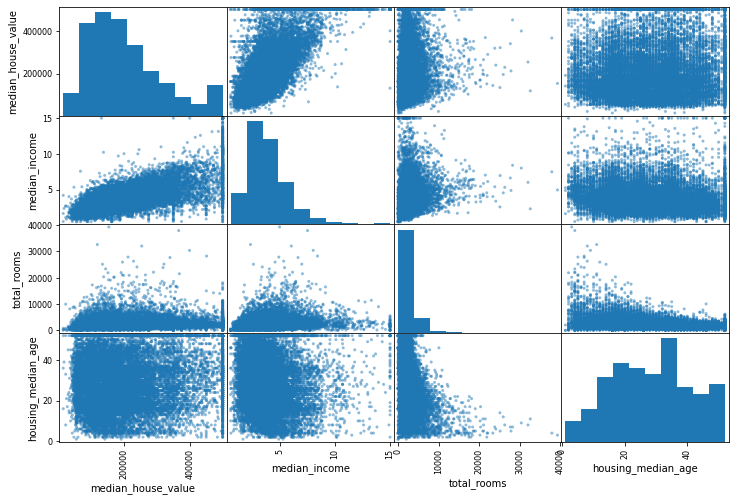

In [84]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value',\
              "median_income",\
              'total_rooms',\
              'housing_median_age']


#select attributes from TRAIN dataset house:

scatter_matrix(house[attributes], figsize=(12,8));
              
              
              

13. Prepare the data for machine learning algorithms
14. Handle the missing values
15. Handle the categorical variables
16. Create a pipeline for transformers 